In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

1.901528549238705 -30.437516029725316
-46.01233588653496 19.600382771973898
29.81379363642506 -169.74875150656365
-14.28611739672614 -86.76938478845624
-17.664724398214403 -50.36866097878297
-18.72780719121613 -40.67575268564798
85.48724958761136 -141.19125981513986
-0.9736934317697887 175.8616364947094
21.768912545868048 81.476493696006
83.21839267763661 54.02436448800671
-3.117752614830792 63.87997764596625
60.76981230900793 -61.16340448354224
-77.67308712038155 58.03177262883378
-52.83694471129918 96.94369484237552
-5.1001408476258945 168.78041199634924
36.73045777137946 164.46502899243035
66.07715078223146 -142.80614828192395
-2.80017602164682 11.915772414303348
57.12734630530542 118.82398716248304
-26.242727878112575 -154.48996879641348
-75.16450247424864 47.93332684254878
64.29767721386511 29.375198245710976
8.249215186475865 -133.12356727268192
-5.862552248382215 48.670905818869386
60.8871296468557 -177.7302788840589
-68.38899356389656 -47.925367256903655
69.50755101597699 -151.

89.08299128983214 -58.78843220082605
23.897114502984053 -10.189919493739268
31.361403293096558 156.6439754652605
9.653043593298918 61.13548107715613
-19.19295357661173 14.848690256020944
47.43777302036227 92.94956375918235
-83.73118319496093 -15.295585227040618
9.482872986011714 -152.988414851974
37.13535968444272 39.33247039942046
59.228570640962175 -131.89475208810714
49.13150559076729 50.132181965015434
10.54144093968452 36.98580374307983
-41.72099232339541 -154.6975333172699
-85.4175022278967 -113.92141392351003
25.88447845122775 96.80819040381795
-19.028949092258543 -93.01657651134344
41.548196260772045 173.99724941065995
-19.119905357677354 -21.109714843048067
68.6090703611373 120.0600078160312
85.97522952243978 -151.0003949714694
-59.60960701476028 4.918025805525929
-55.194432681451964 136.6340938484031
-37.92045493754622 166.34569633082077
-75.24612185232354 -164.35106221161627
-8.87856112870169 136.46641814765923
8.512957071863624 114.59351551065686
73.49942395879725 -11.49140

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | huarmey
Processing Record 5 of Set 1 | santa helena de goias
Processing Record 6 of Set 1 | barra de sao francisco
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | tabukiniberu
City not found. Skipping...
Processing Record 9 of Set 1 | simga
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | ndende
Processing Record 19 of Set 1 | chara
Processing Record 20 of Set 1 | avera
Processing Re

Processing Record 32 of Set 4 | palmer
Processing Record 33 of Set 4 | dingle
Processing Record 34 of Set 4 | sao felix do xingu
Processing Record 35 of Set 4 | iqaluit
Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | deh rawud
City not found. Skipping...
Processing Record 38 of Set 4 | fengzhen
Processing Record 39 of Set 4 | whitianga
Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | markala
Processing Record 43 of Set 4 | galesong
Processing Record 44 of Set 4 | zaysan
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | hervey bay
Processing Record 47 of Set 4 | ranong
Processing Record 48 of Set 4 | papara
Processing Record 49 of Set 4 | isoka
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | waingapu
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | imeni poliny osipenko
Processing Record 4 of Set 5 | tapaua
City not fo

Processing Record 20 of Set 8 | orem
Processing Record 21 of Set 8 | broome
Processing Record 22 of Set 8 | ajdabiya
Processing Record 23 of Set 8 | carutapera
Processing Record 24 of Set 8 | srivardhan
Processing Record 25 of Set 8 | san quintin
Processing Record 26 of Set 8 | camana
Processing Record 27 of Set 8 | beyla
Processing Record 28 of Set 8 | staryy nadym
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | bocaranga
City not found. Skipping...
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | raudeberg
Processing Record 33 of Set 8 | muisne
Processing Record 34 of Set 8 | ipinda
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | teknaf
Processing Record 37 of Set 8 | saint anthony
Processing Record 38 of Set 8 | puerto del rosario
Processing Record 39 of Set 8 | chipinge
Processing Record 40 of Set 8 | horki
Processing Record 41 of Set 8 | bende
Processing Record 42 of Set 8 | chuy
Processing Record 43 of Se

Processing Record 8 of Set 12 | iguape
Processing Record 9 of Set 12 | port arthur
Processing Record 10 of Set 12 | nhulunbuy
Processing Record 11 of Set 12 | lagos
Processing Record 12 of Set 12 | sheltozero
Processing Record 13 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 14 of Set 12 | guanica
Processing Record 15 of Set 12 | pasni
Processing Record 16 of Set 12 | soma
Processing Record 17 of Set 12 | sao joao da barra
Processing Record 18 of Set 12 | manzhouli
Processing Record 19 of Set 12 | sharan
Processing Record 20 of Set 12 | nampula
Processing Record 21 of Set 12 | ambon
Processing Record 22 of Set 12 | boyolangu
Processing Record 23 of Set 12 | tateyama
Processing Record 24 of Set 12 | dakar
Processing Record 25 of Set 12 | trzebiatow
Processing Record 26 of Set 12 | kaabong
Processing Record 27 of Set 12 | segovia
Processing Record 28 of Set 12 | saleaula
City not found. Skipping...
Processing Record 29 of Set 12 | gravdal
Processing Record 30 of S

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
# print(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,73.99,72,75,16.82,BR,2022-07-25 01:51:06
1,Bredasdorp,-34.5322,20.0403,45.93,88,0,6.06,ZA,2022-07-25 01:51:06
2,Kapaa,22.0752,-159.3190,84.52,67,20,14.97,US,2022-07-25 01:51:07
3,Huarmey,-10.0681,-78.1522,63.52,85,85,10.69,PE,2022-07-25 01:51:07
4,Santa Helena De Goias,-17.8136,-50.5969,70.18,40,3,2.62,BR,2022-07-25 01:51:07
5,Barra De Sao Francisco,-18.7550,-40.8908,63.45,94,7,2.68,BR,2022-07-25 01:51:07
6,Tuktoyaktuk,69.4541,-133.0374,48.20,81,75,9.22,CA,2022-07-25 01:51:08
7,Simga,21.6333,81.7000,77.07,89,100,9.93,IN,2022-07-25 01:51:08
8,Victoria,22.2855,114.1577,94.96,76,14,8.99,HK,2022-07-25 01:48:58
9,Pangnirtung,66.1451,-65.7125,52.23,71,94,2.15,CA,2022-07-25 01:51:09


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2022-07-25 01:51:06,-5.1989,-35.4608,73.99,72,75,16.82
1,Bredasdorp,ZA,2022-07-25 01:51:06,-34.5322,20.0403,45.93,88,0,6.06
2,Kapaa,US,2022-07-25 01:51:07,22.0752,-159.3190,84.52,67,20,14.97
3,Huarmey,PE,2022-07-25 01:51:07,-10.0681,-78.1522,63.52,85,85,10.69
4,Santa Helena De Goias,BR,2022-07-25 01:51:07,-17.8136,-50.5969,70.18,40,3,2.62
5,Barra De Sao Francisco,BR,2022-07-25 01:51:07,-18.7550,-40.8908,63.45,94,7,2.68
6,Tuktoyaktuk,CA,2022-07-25 01:51:08,69.4541,-133.0374,48.20,81,75,9.22
7,Simga,IN,2022-07-25 01:51:08,21.6333,81.7000,77.07,89,100,9.93
8,Victoria,HK,2022-07-25 01:48:58,22.2855,114.1577,94.96,76,14,8.99
9,Pangnirtung,CA,2022-07-25 01:51:09,66.1451,-65.7125,52.23,71,94,2.15


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

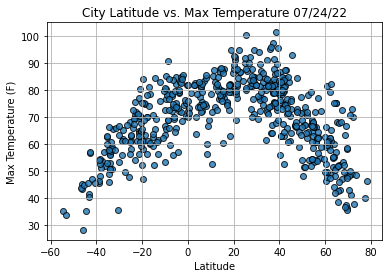

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

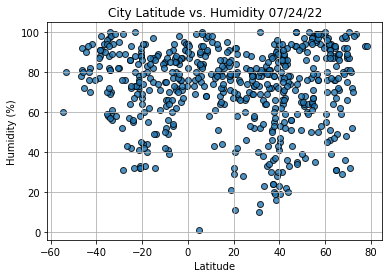

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

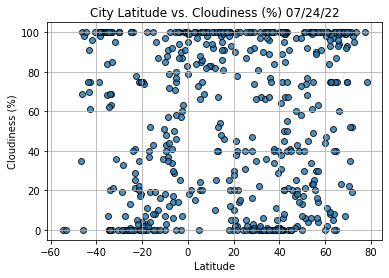

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

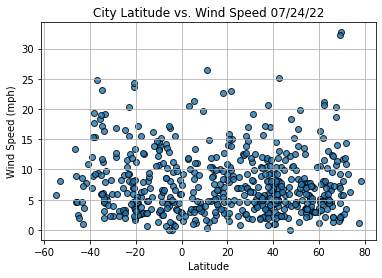

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Fairbanks
Country                        US
Date          2022-07-25 01:51:03
Lat                       64.8378
Lng                     -147.7164
Max Temp                    75.09
Humidity                       31
Cloudiness                      0
Wind Speed                   6.91
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2022-07-25 01:51:07,22.0752,-159.3190,84.52,67,20,14.97
6,Tuktoyaktuk,CA,2022-07-25 01:51:08,69.4541,-133.0374,48.20,81,75,9.22
7,Simga,IN,2022-07-25 01:51:08,21.6333,81.7000,77.07,89,100,9.93
8,Victoria,HK,2022-07-25 01:48:58,22.2855,114.1577,94.96,76,14,8.99
9,Pangnirtung,CA,2022-07-25 01:51:09,66.1451,-65.7125,52.23,71,94,2.15
...,...,...,...,...,...,...,...,...,...
563,Lianzhou,CN,2022-07-25 02:05:51,24.7811,112.3825,92.03,60,31,2.28
564,San Andres,CO,2022-07-25 02:05:51,12.5847,-81.7006,82.42,78,40,10.36
565,Ukiah,US,2022-07-25 02:05:51,39.1502,-123.2078,95.43,30,0,8.05
566,Vestmanna,FO,2022-07-25 02:05:52,62.1564,-7.1664,47.32,87,75,20.71


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

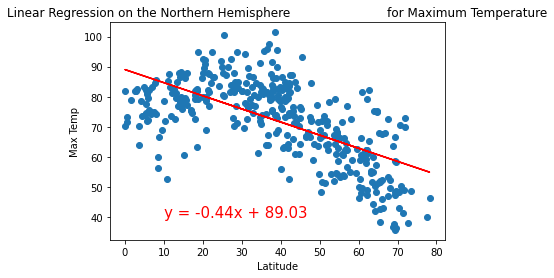

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

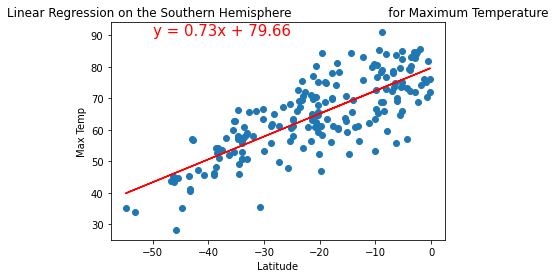

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

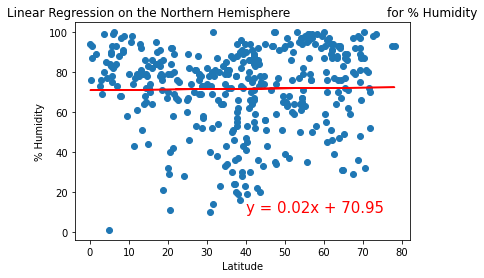

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

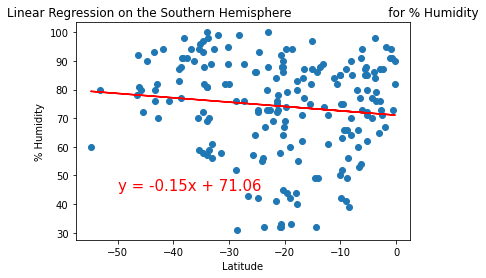

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,45))

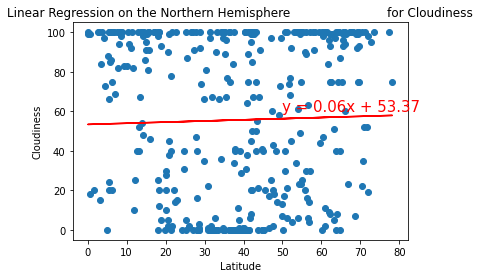

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(50,60))

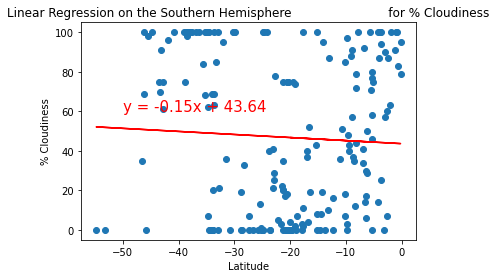

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

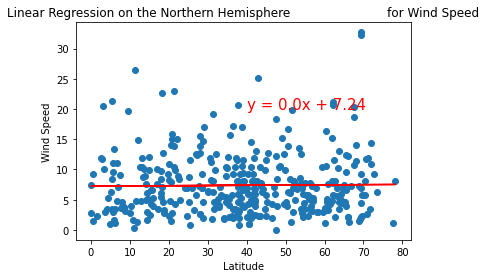

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

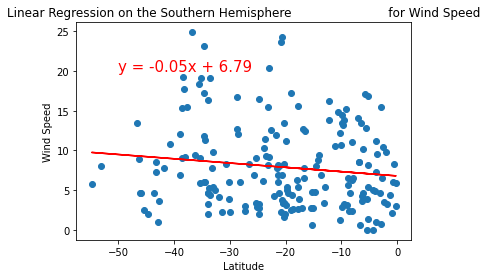

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

In [34]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [52]:
!jupyter nbextension enable --py -- gmaps
!jupyter nbextension enable --py -- widgetsnbextension

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [35]:
# !pip install gmaps

In [36]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Touros,BR,2022-07-25 01:51:06,-5.1989,-35.4608,73.99,72,75,16.82
1,1,Bredasdorp,ZA,2022-07-25 01:51:06,-34.5322,20.0403,45.93,88,0,6.06
2,2,Kapaa,US,2022-07-25 01:51:07,22.0752,-159.3190,84.52,67,20,14.97
3,3,Huarmey,PE,2022-07-25 01:51:07,-10.0681,-78.1522,63.52,85,85,10.69
4,4,Santa Helena De Goias,BR,2022-07-25 01:51:07,-17.8136,-50.5969,70.18,40,3,2.62


In [37]:
# check data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [38]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [53]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [60]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [62]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [65]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Kapaa,US,2022-07-25 01:51:07,22.0752,-159.3190,84.52,67,20,14.97
7,7,Simga,IN,2022-07-25 01:51:08,21.6333,81.7000,77.07,89,100,9.93
13,13,Fairbanks,US,2022-07-25 01:51:03,64.8378,-147.7164,75.09,31,0,6.91
15,15,Chara,RU,2022-07-25 01:51:10,56.9064,118.2631,76.98,50,4,3.11
16,16,Avera,US,2022-07-25 01:51:11,33.1940,-82.5271,80.65,80,100,7.11
19,19,Atuona,PF,2022-07-25 01:50:16,-9.8000,-139.0333,76.64,63,3,13.44
22,22,College,US,2022-07-25 01:51:12,64.8569,-147.8028,75.07,31,40,6.91
24,24,Lexington,US,2022-07-25 01:50:30,37.9887,-84.4777,83.08,66,0,5.75
25,25,Katsuura,JP,2022-07-25 01:51:13,35.1333,140.3000,82.81,81,100,12.01
26,26,Hithadhoo,MV,2022-07-25 01:51:13,-0.6000,73.0833,81.86,73,83,8.28


In [66]:
preferred_cities_df.count()

City_ID       207
City          207
Country       207
Date          207
Lat           207
Lng           207
Max Temp      207
Humidity      207
Cloudiness    207
Wind Speed    207
dtype: int64

In [67]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Kapaa,US,84.52,22.0752,-159.3190,
7,Simga,IN,77.07,21.6333,81.7000,
13,Fairbanks,US,75.09,64.8378,-147.7164,
15,Chara,RU,76.98,56.9064,118.2631,
16,Avera,US,80.65,33.1940,-82.5271,
19,Atuona,PF,76.64,-9.8000,-139.0333,
22,College,US,75.07,64.8569,-147.8028,
24,Lexington,US,83.08,37.9887,-84.4777,
25,Katsuura,JP,82.81,35.1333,140.3000,
26,Hithadhoo,MV,81.86,-0.6000,73.0833,


In [74]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    
    # Grab the first hotel from the results and store the name.

except (IndexError):
    print("Hotel not found... skipping.")

Hotel not found... skipping.


In [76]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Kapaa,US,84.52,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
7,Simga,IN,77.07,21.6333,81.7000,OM Hotel & Sweet
13,Fairbanks,US,75.09,64.8378,-147.7164,Westmark Fairbanks Hotel & Conference Center
15,Chara,RU,76.98,56.9064,118.2631,
16,Avera,US,80.65,33.1940,-82.5271,
19,Atuona,PF,76.64,-9.8000,-139.0333,
22,College,US,75.07,64.8569,-147.8028,
24,Lexington,US,83.08,37.9887,-84.4777,
25,Katsuura,JP,82.81,35.1333,140.3000,
26,Hithadhoo,MV,81.86,-0.6000,73.0833,


In [78]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [79]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [80]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [81]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))